In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


# Let's try boxplots
In order to draw a boxplot we need to use df['column(s) of interest'].plot(kind = 'box')

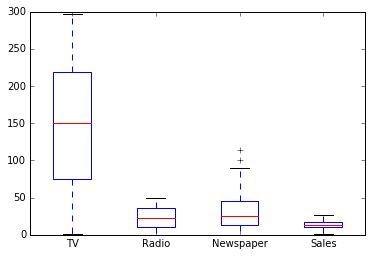

In [3]:
# Your boxplots
#df['column(s) of interest'].plot(kind = 'box')
data.plot(kind = 'box')

#### What do we learn from TV, Radio, Newspaper and Sales Box-plots?

Answer: Newspaper is the only set with outliers; radio and TV appear near symmetrical while newspaper and sales have a positive skew

# Let's play with correlation

Find Correlations Matrix of your data and explain what you've learned from it. For instance, which variable can depict Sales the best? (TV, Radio or Newspaper). What is the highest and lowest correlation?  
hint: df.corr() returns Matrix of correlation


In [9]:
# your Corrolation code shall be written here:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


What did you learn from correlation Matrix?
Answer: TV has the strongest linear relationship with Sales

# Let's get rid of outliers.

First: Look over your box-plots and pick one variable that likely has outliers. # Newspaper

Second: Find Interquartile Range (IQR) of that variable. You can do this in two different ways. 
    - Use df.describe()
    - Use df.quantile()
Third: Remember, one definition of outliers is anything that is more than 1.5*IQR above Q3 or 1.5QR below Q1 (For this example solely focus on 1.5*IQR above Q3)
Fourth: delete the outlier rows.

#### Which Variable seems to have outliers?

Answer: 

In [11]:
# Before you start check how many observations are in your DataFrame
data.describe() #200 observations

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [15]:
#Step 2 Let's find IQR
data['Newspaper'].quantile(.75) - data['Newspaper'].quantile(.25) # IQR is 32.35

32.350000000000001

In [24]:
#Step 3
iqr = data['Newspaper'].quantile(.75) - data['Newspaper'].quantile(.25)
quant_one = data['Newspaper'].quantile(.25)
quant_three = data['Newspaper'].quantile(.75)
#data['Newspaper'][(data['Newspaper']>(1.5*iqr+quant_three)) | (data['Newspaper']<(quant_one-1.5*iqr))]
data.drop(data['Newspaper'][(data['Newspaper']>(1.5*iqr+quant_three)) | (data['Newspaper']<(quant_one-1.5*iqr))].index,inplace = True)

In [25]:
# Check the length of your data and see if you have correctly dropped outliers.
data['Newspaper'].describe()

count    198.000000
mean      29.777273
std       20.446303
min        0.300000
25%       12.650000
50%       25.600000
75%       44.050000
max       89.400000
Name: Newspaper, dtype: float64

# Your last mission!

Our goal is to divide our dataset to High Sales and Low Sales. We would like to add a dummy variable called Sales_Dummy which is 0 if Sales of that specific observation is less than Median of all Sales and is 1 if sales is more than median of Sales.

In [34]:
"""
We can do it in shorter steps - but for education purposes, first define a variable called 
SalesCategory which is Low when Sales is less than Median and High otherwise. 
"""
sales_median = data['Sales'].median()
data['Sales_Dummy'] = 0
greater_med = data['Sales']  > sales_median
#greater_med
data.loc[greater_med, 'Sales_Dummy'] = 1
#data['Sales_Dummy'][greater_med] = 1 #NOT SAFE
print("sales median:",sales_median)
data

('sales median:', 12.9)


,TV,Radio,Newspaper,Sales,Sales_Dummy
1,230.1,37.8,69.2,22.1,1
2,44.5,39.3,45.1,10.4,0
3,17.2,45.9,69.3,9.3,0
4,151.5,41.3,58.5,18.5,1
5,180.8,10.8,58.4,12.9,0
6,8.7,48.9,75.0,7.2,0
7,57.5,32.8,23.5,11.8,0
8,120.2,19.6,11.6,13.2,1
9,8.6,2.1,1.0,4.8,0
10,199.8,2.6,21.2,10.6,0
